In [2]:
!pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative
Confusion Matrix:
 [[1769   79   41]
 [ 291  244   45]
 [ 139   44  276]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.94      0.87      1889
     neutral       0.66      0.42      0.52       580
    positive       0.76      0.60      0.67       459

    accuracy                           0.78      2928
   macro avg       0.74      0.65      0.68      2928
weighted avg       0.77      0.78      0.77      2928



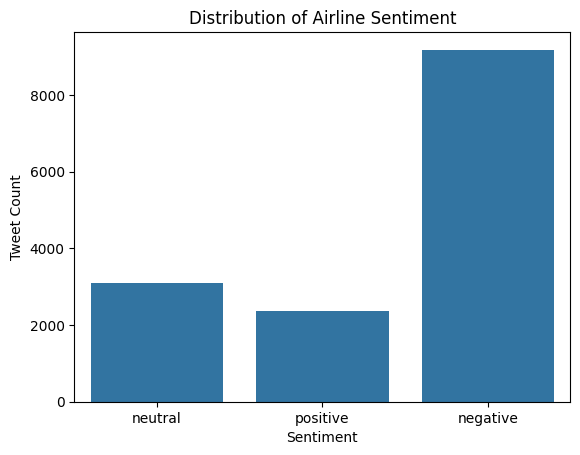

In [6]:
# Task-2: Sentiment Analysis using TF-IDF and Logistic Regression

# 📌 Step 1: Import Libraries
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

import nltk
nltk.download('stopwords')


# 📌 Step 2: Load Dataset
# Load your CSV file
df = pd.read_csv('reviews.csv')  # Adjust file name/path if needed

# Display first few rows to confirm
print(df[['text', 'airline_sentiment']].head())


# 📌 Step 3: clean and Preprocessing data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()  # Convert to string in case of NaN
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)


# 📌 Step 4: Vectorize Text and Prepare Dataset
# Features and Labels
X = df['clean_text']
y = df['airline_sentiment']  # Target: positive / neutral / negative

# Vectorize
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)


# 📌 Step 5: Train model
model = MultinomialNB()
model.fit(X_train, y_train)


# 📌 Step 6: evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# 📌 Step 7: Visualize Sentiment Distribution
sns.countplot(x='airline_sentiment', data=df)
plt.title("Distribution of Airline Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

